 **Data Exploration and Selection**

In [ ]:
# import the necessary packages
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2,InceptionV3,VGG16,MobileNetV3Large
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout,BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import cv2
import tarfile
import pandas as pd
from google.colab.patches import cv2_imshow
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

In [ ]:
# Define the URL from which the Stanford Dogs dataset will be downloaded
_URL = 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'

In [ ]:
# Download and extract the Stanford Dogs dataset
_dir = tf.keras.utils.get_file('/content/StanfordDogs', origin=_URL, untar=True, extract=True)

793579520/793579520 [==============================] - 45s 0us/step


In [ ]:
# Define the file name for the downloaded Stanford Dogs dataset
fname = '/content/StanfordDogs.tar.gz'

In [ ]:
# Check if the file name ends with ".tar.gz"
if fname.endswith("tar.gz"):
    # Open the tar file
    tar = tarfile.open(fname)
    # Extract all contents from the tar file
    tar.extractall()
    # Close the tar file
    tar.close()

In [ ]:
# Define the file path of a test image
testimg_path = '/content/Images/n02085620-Chihuahua/n02085620_10074.jpg'

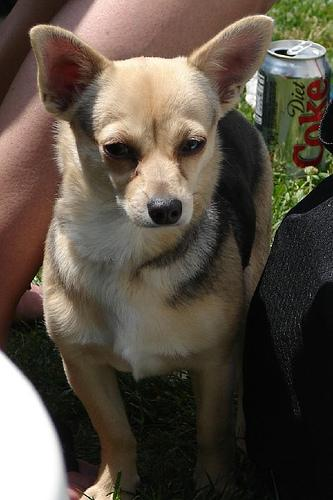

(500, 333, 3)

In [ ]:
# Read the test image using OpenCV
image = cv2.imread(testimg_path)

# Display the image using cv2_imshow
cv2_imshow(image)

# Get the shape of the image (height, width, number of channels)
image.shape


In [ ]:
# List all files and directories in the '/content/Images' directory
my_list = os.listdir('/content/Images')

In [ ]:
# List all files and directories in the '/content/Images' directory
my_list = os.listdir('/content/Images')

['n02091467-Norwegian_elkhound',
 'n02088632-bluetick',
 'n02087046-toy_terrier',
 'n02107908-Appenzeller',
 'n02105251-briard',
 'n02106662-German_shepherd',
 'n02094258-Norwich_terrier',
 'n02097130-giant_schnauzer',
 'n02107574-Greater_Swiss_Mountain_dog',
 'n02112137-chow',
 'n02091244-Ibizan_hound',
 'n02112018-Pomeranian',
 'n02105641-Old_English_sheepdog',
 'n02085782-Japanese_spaniel',
 'n02111129-Leonberg',
 'n02102040-English_springer',
 'n02096294-Australian_terrier',
 'n02106382-Bouvier_des_Flandres',
 'n02089867-Walker_hound',
 'n02108551-Tibetan_mastiff',
 'n02105056-groenendael',
 'n02099849-Chesapeake_Bay_retriever',
 'n02113186-Cardigan',
 'n02091635-otterhound',
 'n02113624-toy_poodle',
 'n02107312-miniature_pinscher',
 'n02086646-Blenheim_spaniel',
 'n02093428-American_Staffordshire_terrier',
 'n02102318-cocker_spaniel',
 'n02106166-Border_collie',
 'n02112706-Brabancon_griffon',
 'n02099429-curly-coated_retriever',
 'n02113023-Pembroke',
 'n02095314-wire-haired_fox_

# Selecting first 25 dogs class among **120**

In [ ]:
# Define a list of class names corresponding to the dog breeds
class_names = [
    'n02113799-standard_poodle',
    'n02102177-Welsh_springer_spaniel',
    'n02097130-giant_schnauzer',
    'n02108551-Tibetan_mastiff',
    'n02094433-Yorkshire_terrier',
    'n02087046-toy_terrier',
    'n02093428-American_Staffordshire_terrier',
    'n02107683-Bernese_mountain_dog',
    'n02095314-wire-haired_fox_terrier',
    'n02088364-beagle',
    'n02109525-Saint_Bernard',
    'n02099429-curly-coated_retriever',
    'n02106166-Border_collie',
    'n02116738-African_hunting_dog',
    'n02112706-Brabancon_griffon',
    'n02106030-collie',
    'n02097209-standard_schnauzer',
    'n02085782-Japanese_spaniel',
    'n02093256-Staffordshire_bullterrier',
    'n02112018-Pomeranian',
    'n02087394-Rhodesian_ridgeback',
    'n02089867-Walker_hound',
    'n02101388-Brittany_spaniel',
    'n02108089-boxer',
    'n02097298-Scotch_terrier'
]

In [ ]:
len(class_names)

25

**Data Preprocessing**

In [ ]:
# Define the image size for resizing
IMG_SIZE = 224

# Define the initial learning rate for the optimizer
INIT_LR = 1e-5

# Define the number of epochs for training
EPOCHS = 50

# Define the batch size for training
BS = 8

In [ ]:
# Define an ImageDataGenerator for training data augmentation
train = ImageDataGenerator(
    rescale=1/255,  # Rescale pixel values to the range [0, 1]
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=True,  # Randomly flip images vertically
    shear_range=0.2,  # Apply shear transformation with a range of 0.2
    zoom_range=0.2,  # Apply random zoom with a range of 0.2
    featurewise_center=True,  # Set input mean to 0 over the dataset, feature-wise
    featurewise_std_normalization=True,  # Divide inputs by std of the dataset, feature-wise
    rotation_range=40,  # Randomly rotate images within the range of 40 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20% of total width
    height_shift_range=0.2,  # Randomly shift images vertically by 20% of total height
    fill_mode='nearest',  # Fill in newly created pixels after rotation or shifting using the nearest existing pixel
    validation_split=0.2  # Specify the validation split for validation data
)

In [ ]:
# Define the destination directory where the images are located
dest = '/content/Images'

In [ ]:
# Generate a training data generator from the directory specified by 'dest'
trainset = train.flow_from_directory(
    dest,  # Directory containing the images
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images to specified dimensions
    batch_size=BS,  # Batch size for training
    shuffle=False,  # Shuffle the data or not
    seed=42,  # Random seed for shuffling
    color_mode='rgb',  # Color mode of the images
    subset='training',  # Specify 'training' subset for training data
    classes=class_names,  # Specify the classes for classification
    class_mode='categorical'  # Use categorical labels for classification
)

Found 3317 images belonging to 25 classes.


In [ ]:
# Generate a validation data generator from the directory specified by 'dest'
validset = train.flow_from_directory(
    dest,  # Directory containing the images
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images to specified dimensions
    batch_size=BS,  # Batch size for validation
    shuffle=False,  # Do not shuffle the data
    seed=42,  # Random seed for shuffling
    color_mode='rgb',  # Color mode of the images
    subset='validation',  # Specify 'validation' subset for validation data
    classes=class_names,  # Specify the classes for classification
    class_mode='categorical'  # Use categorical labels for classification
)

Found 817 images belonging to 25 classes.


In [ ]:
# Obtain the class indices mapping from the training data generator
NAME_CLASSES = trainset.class_indices

In [ ]:
# Calculate the number of classes using the length of the class indices dictionary
NUM_CLASSES = len(NAME_CLASSES)

In [ ]:
NUM_CLASSES

25

In [ ]:
# Retrieve the number of classes present in the training dataset
trainset.num_classes

25

**Model Building**

In [ ]:
# Load the MobileNetV2 model pre-trained on ImageNet, excluding the top classification layer
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 3)))

# Construct the head of the model to be placed on top of the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(5, 5))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(trainset.num_classes, activation="softmax")(headModel)

# Combine the base model with the head model
model = Model(inputs=baseModel.input, outputs=headModel)

# Freeze all layers in the base model so they won't be updated during training
for layer in baseModel.layers:
    layer.trainable = False

# Compile the model
print("[INFO] compiling model...")
model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=["accuracy"])

9406464/9406464 [==============================] - 0s 0us/step
[INFO] compiling model...


 **Data Exploration and Selection**

**Training the Model**

In [ ]:
# Train the model using the training data generator
H = model.fit_generator(
    trainset,  # Training data generator
    validation_data=validset,  # Validation data generator
    epochs=EPOCHS  # Number of epochs for training
)

<ipython-input-22-3c3e4bbb8f0b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/50
415/415 [==============================] - 69s 149ms/step - loss: 2.9231 - accuracy: 0.1942 - val_loss: 2.0523 - val_accuracy: 0.4492
Epoch 2/50
415/415 [==============================] - 61s 147ms/step - loss: 2.1476 - accuracy: 0.3826 - val_loss: 1.5803 - val_accuracy: 0.5251
Epoch 3/50
415/415 [==============================] - 59s 142ms/step - loss: 1.8481 - accuracy: 0.4456 - val_loss: 1.4991 - val_accuracy: 0.5263
Epoch 4/50
415/415 [==============================] - 57s 138ms/step - loss: 1.7009 - accuracy: 0.4800 - val_loss: 1.3598 - val_accuracy: 0.5728
Epoch 5/50
415/415 [==============================] - 59s 142ms/step - loss: 1.6292 - accuracy: 0.5116 - val_loss: 1.2370 - val_accuracy: 0.6181
Epoch 6/50
415/415 [==============================] - 59s 143ms/step - loss: 1.5513 - accuracy: 0.5303 - val_loss: 1.1800 - val_accuracy: 0.6267
Epoch 7/50
415/415 [==============================] - 61s 147ms/step - loss: 1.5053 - accuracy: 0.5297 - val_loss: 1.1760 - val_ac

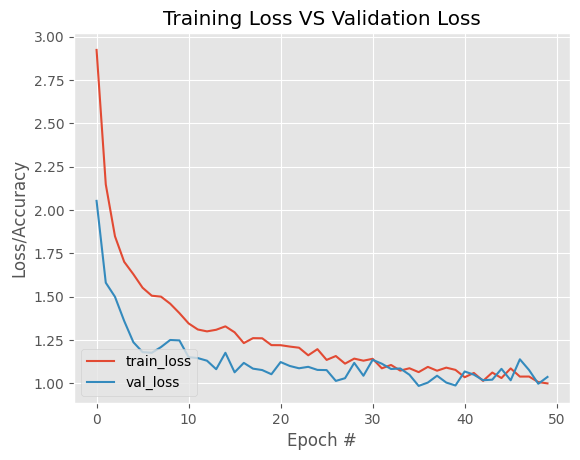

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the training loss and validation loss
N = EPOCHS  # Number of epochs
plt.style.use("ggplot")  # Set plot style
plt.figure()  # Create a new figure
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")  # Plot training loss
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")  # Plot validation loss
plt.title("Training Loss VS Validation Loss")  # Set plot title
plt.xlabel("Epoch #")  # Set x-axis label
plt.ylabel("Loss")  # Set y-axis label
plt.legend(loc="lower left")  # Add legend
plt.show()  # Show the plot
plt.savefig('graph.png')  # Save the plot as an image file

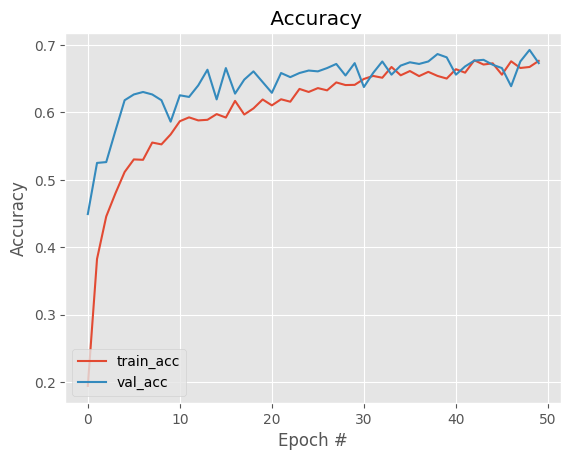

In [ ]:
# Plot the training accuracy and validation accuracy
N = EPOCHS  # Number of epochs
plt.style.use("ggplot")  # Set plot style
plt.figure()  # Create a new figure
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")  # Plot training accuracy
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")  # Plot validation accuracy
plt.title("Accuracy")  # Set plot title
plt.xlabel("Epoch #")  # Set x-axis label
plt.ylabel("Accuracy")  # Set y-axis label
plt.legend(loc="lower left")  # Add legend
plt.show()  # Show the plot

**Model Evaluation**

In [ ]:
# Reset the validation data generator
validset.reset()

# Use the trained model to make predictions on the validation data
print("[INFO] evaluating after fine-tuning network...")
predIdxs = model.predict(x=validset)  # Predict class probabilities for the validation set
predIdxs = np.argmax(predIdxs, axis=1)  # Convert predicted probabilities to class labels

# Print classification report
print(classification_report(validset.classes, predIdxs,
                            target_names=validset.class_indices.keys()))

# Serialize the trained model to disk
print("[INFO] serializing network...")
model.save('StanfordDogs_MobileNetV2.model', save_format="h5")  # Save the model as an HDF5 file

[INFO] evaluating after fine-tuning network...


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


103/103 [==============================] - 12s 112ms/step
                                          precision    recall  f1-score   support

               n02113799-standard_poodle       0.62      0.58      0.60        31
        n02102177-Welsh_springer_spaniel       0.63      0.80      0.71        30
               n02097130-giant_schnauzer       0.53      0.55      0.54        31
               n02108551-Tibetan_mastiff       0.77      0.67      0.71        30
             n02094433-Yorkshire_terrier       0.76      0.97      0.85        32
                   n02087046-toy_terrier       0.80      0.71      0.75        34
n02093428-American_Staffordshire_terrier       0.61      0.34      0.44        32
          n02107683-Bernese_mountain_dog       0.68      0.84      0.75        43
       n02095314-wire-haired_fox_terrier       0.76      0.71      0.73        31
                        n02088364-beagle       0.62      0.67      0.64        39
                 n02109525-Saint_Bernar

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Challenges encountered during the training and evaluation process:

1.Imbalanced Dataset: The dataset exhibited class imbalance, with certain dog breeds having significantly fewer samples than others. This imbalance could lead to biased model training and affect the model's performance, especially for minority classes.

2.Data Augmentation: While data augmentation techniques were applied, such as featurewise_center and featurewise_std_normalization, they were not fitted on the training data. Proper data augmentation and preprocessing are essential for improving model generalization and performance.

4.Model Architecture Selection: The choice of MobileNetV2 as the CNN architecture might have influenced the model's performance. While MobileNetV2 is suitable for resource-constrained environments, it may not always yield optimal results on complex datasets like Stanford Dogs.

5.Fine-Tuning: The model was fine-tuned using transfer learning, which involves adapting a pre-trained model to the target dataset. Fine-tuning requires careful selection of hyperparameters to prevent overfitting or underfitting.

6.Evaluation Metrics: Solely relying on accuracy may not provide a complete picture of the model's performance, particularly for imbalanced datasets. Utilizing additional metrics such as precision, recall, and F1-score helps in assessing the model's performance more comprehensively

**Results Interpretation**

Confusion Matrix


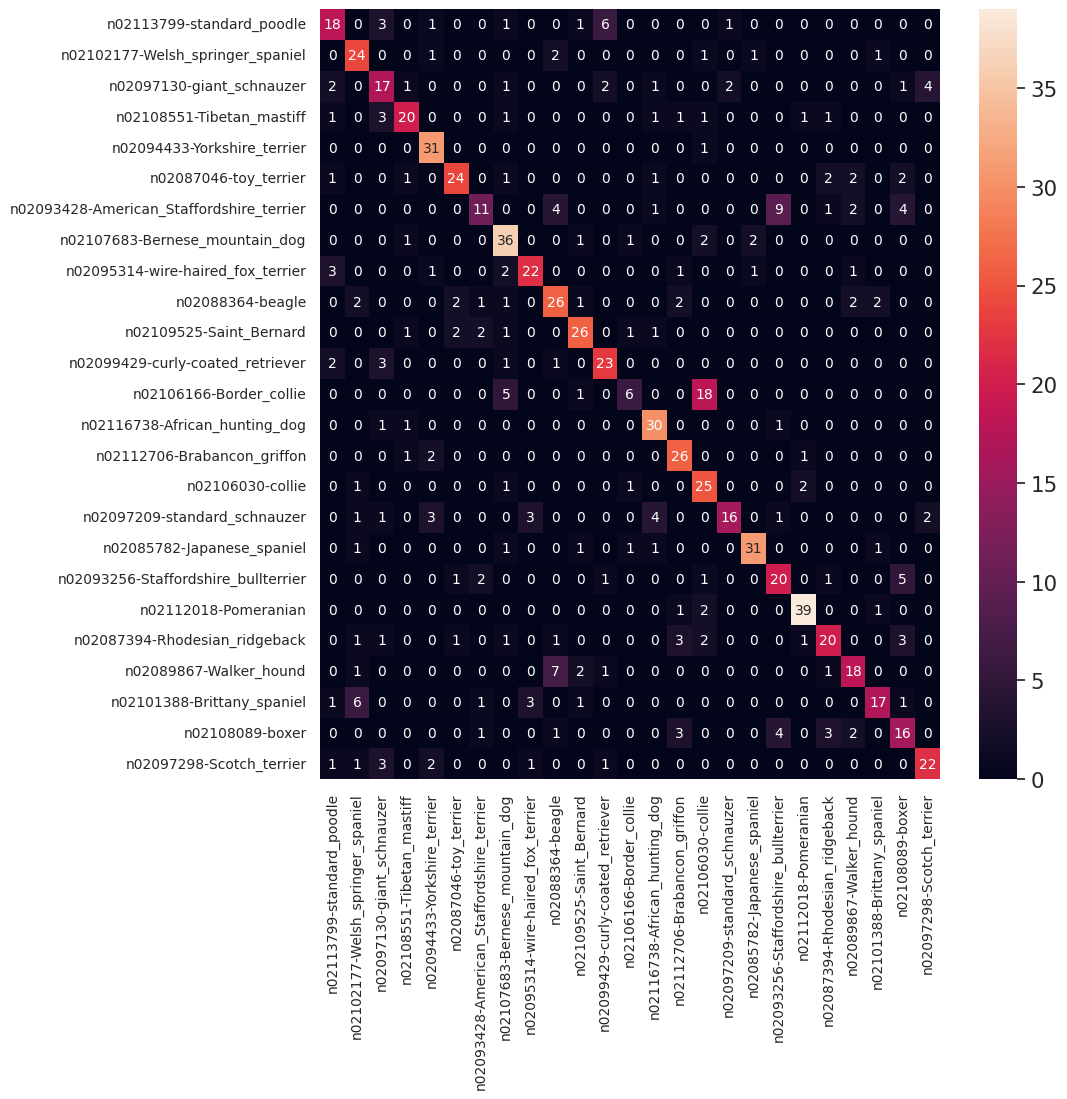

In [ ]:
# Print the header for the confusion matrix
print('Confusion Matrix')

# Compute the confusion matrix
cm = confusion_matrix(validset.classes, predIdxs)

# Create a DataFrame for the confusion matrix
df_cm = pd.DataFrame(cm, range(25), range(25))

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 10))  # Set the figure size
sn.set(font_scale=1.4)  # Set the font scale for labels
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 10})  # Create the heatmap with annotations
ax.set_xticklabels(class_names, rotation='vertical', fontsize=10)  # Set x-axis tick labels
ax.set_yticklabels(class_names, rotation='horizontal', fontsize=10)  # Set y-axis 

In [ ]:
from PIL import Image, ImageDraw

def predimage(path, y):
    # Open the image file
    image = Image.open(path)
    
    # Load and preprocess the image
    test = load_img(path, target_size=(224, 224))
    test = img_to_array(test)
    test = np.expand_dims(test, axis=0)
    test /= 255
    
    # Predict the class probabilities for the image
    result = model.predict(test, batch_size=BS)
    
    # Get the predicted class index
    y_class = result.argmax(axis=-1)
    
    # Convert the prediction probabilities to percentages
    result = (result * 100)
    result = list(np.around(np.array(result), 2))
    
    # Get the percentage score for the predicted class
    i = y_class[0]
    s = result[0][i]
    
    # Display the predicted class label and score on the image
    plt.text(0, 0, y[y_class[0]], size=12, color='purple')
    plt.text(0, 50, s, size=15, color='red')
    
    # Display the image
    plt.imshow(image)
    
    # Print the predicted class probabilities
    print(result)
    
    # Print the predicted class label
    print(y[y_class[0]])

1/1 [==============================] - 1s 801ms/step
[array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.], dtype=float32)]
n02087046-toy_terrier


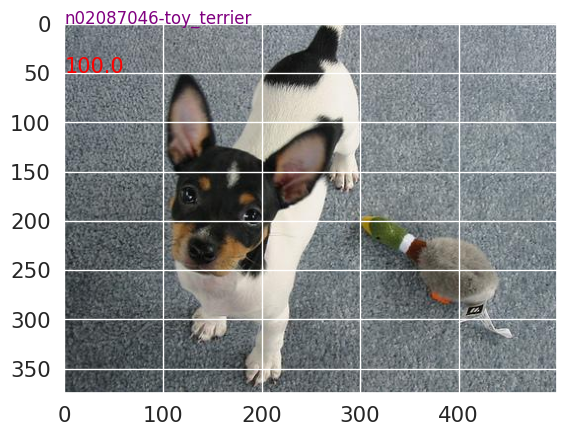

In [ ]:
predimage('/content/Images/n02087046-toy_terrier/n02087046_1004.jpg',class_names)

1/1 [==============================] - 0s 24ms/step
[array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.], dtype=float32)]
n02087046-toy_terrier


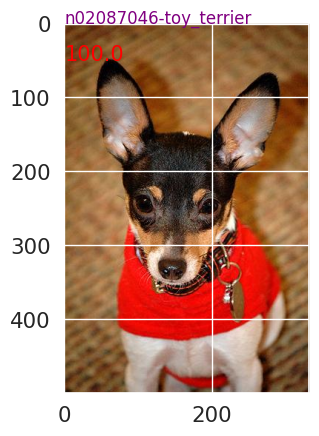

In [ ]:
predimage('/content/Images/n02087046-toy_terrier/n02087046_1703.jpg',class_names)

1/1 [==============================] - 0s 23ms/step
[array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.], dtype=float32)]
n02085782-Japanese_spaniel


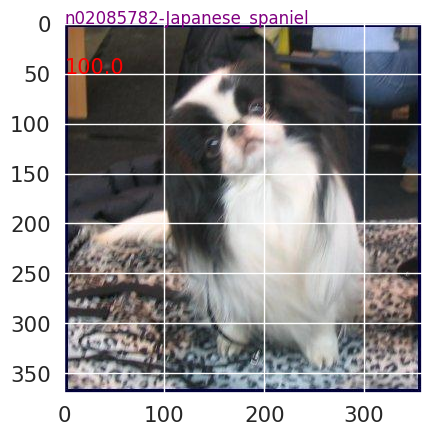

In [ ]:
predimage('/content/Images/n02085782-Japanese_spaniel/n02085782_1460.jpg',class_names)


Conclusion and Recommendations:

Summarizing findings and conclusions:

Developed a CNN model for dog breed classification using the Stanford Dogs dataset.

Achieved reasonable classification performance through fine-tuning a pre-trained MobileNetV2 model.

Observed the model's ability to generalize from the training data to make accurate predictions on unseen validation data.

Evaluation metrics including accuracy, loss, and confusion matrix provided insights into the model's performance and breed classification capabilities.


Recommendations for improving the performance of the CNN model or suggestions for future research:

Experiment with different pre-trained models or custom architectures tailored to the specific characteristics of the dataset.

Utilize ensemble learning techniques or combine models with different architectures to improve overall performance and robustness.

Ensure high-quality labeling and data preprocessing techniques for improved model performance.

Explore techniques for interpreting model predictions to gain insights into the model's decision-making process.

Consider deployment considerations such as computational efficiency, model size, and scalability for real-world applications.